In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pk
import re 
from sentence_transformers import SentenceTransformer, util
import faiss

In [3]:
path = 'd:/Git_Proyects/Tesis/Faiss_vect/October_vect/'
index = faiss.read_index(path+'vect_faiss_1')

In [4]:
Tw_october = pd.read_csv(path+'../Tweets_October.csv')
Tw_october  = Tw_october.dropna(subset=['Tw_limpios'])
Tw_october = Tw_october.reset_index()

C:\Users\Ale\AppData\Local\Temp\ipykernel_14404\2120276555.py:1: DtypeWarning: Columns (0,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  Tw_october = pd.read_csv(path+'../Tweets_October.csv')


In [35]:
tw_file = Tw_october[1000000:2000000]
tw_file = tw_file.reset_index()

In [113]:
import numpy as np
encoder = SentenceTransformer("hiiamsid/sentence_similarity_spanish_es")

search_text = 'a favor de las dos vidas'
search_vector = encoder.encode(search_text)
_vector = np.array([search_vector])
faiss.normalize_L2(_vector)

In [114]:
k = index.ntotal
distances, ann = index.search(_vector, k=k)

In [115]:
results = pd.DataFrame({'distances': distances[0], 'ann': ann[0]})


In [116]:
merge = pd.merge(results,tw_file, left_on='ann', right_index=True)
res = merge[merge['distances']<0.9]
res

,distances,ann,level_0,index,id,Tweets,Tw_limpios,Fecha,urls,medios,source
0,0.679551,123944,6123944,6851212,1183893582895374336,@MiguelPichetto Vamos Pichetto!!! 💪💪🇦🇷🇦🇷🇦🇷,MiguelPichetto Vamos Pichetto!!!,Mon Oct 14 23:53:20 +0000 2019,NaN,False,Twitter for Android
1,0.784900,380312,6380312,7107580,1181951710635450368,#MaríaEugeniaVidal entregó escrituras propieta...,entregó escrituras propietarias en,Wed Oct 09 15:17:02 +0000 2019,https://elcorreografico.com.ar/vidal-entrego-e...,False,WordPress.com
2,0.786319,619085,6619085,7346353,1180107837135052801,EN DETALLE: ASÍ SERÁ LA NUEVA LEY DE ALQUILERE...,EN DETALLE: ASÍ SERÁ LA NUEVA LEY DE ALQUILERE...,Fri Oct 04 13:10:08 +0000 2019,https://milenico.com.ar/2019/10/04/ley-alquile...,False,Twitter for Android
3,0.869736,325166,6325166,7052434,1188534519588163584,«Yo no me dejé arrancar el alma que traje de l...,«Yo no me dejé arrancar el alma que traje de l...,Sun Oct 27 19:14:46 +0000 2019,NaN,False,Twitter for Android
4,0.893090,749298,6749298,7476566,1183149977146667009,@Nataliabrites5 @susanagladysfer Según Pompis ...,Nataliabrites5 susanagladysfer Según Pompis el...,Sat Oct 12 22:38:31 +0000 2019,NaN,False,Twitter Web App


In [ ]:
indice = 18
res['Tw_limpios'][indice], res['Tweets'][indice]

Todo Junto

In [43]:
path = 'd:/Git_Proyects/Tesis/Faiss_vect/October_vect/'
encoder = SentenceTransformer("hiiamsid/sentence_similarity_spanish_es")

subdivition = [0,1000000, 2000000, 3000000, 5000000, 6000000, len(Tw_october)]

search_text = 'habría que dinamitar todo, que vuele todo por el aire'
search_vector = encoder.encode(search_text)
_vector = np.array([search_vector])
faiss.normalize_L2(_vector)

df = pd.DataFrame(columns=['distances', 'Tweets', 'index', 'id', 'Fecha'])

for i in range(len(subdivition) - 1):
    index = faiss.read_index(path+f'vect_faiss_{i}')
    
    tw_file = Tw_october[subdivition[i]:subdivition[i+1]]
    tw_file = tw_file.reset_index()
    
    k = index.ntotal
    distances, ann = index.search(_vector, k=k)

    results = pd.DataFrame({'distances': distances[0], 'ann': ann[0]})
    
    merge = pd.merge(results,tw_file, left_on='ann', right_index=True)
    res = merge[merge['distances']<0.93]
    df  = pd.concat([df, res[['distances', 'Tweets', 'index', 'id', 'Fecha']]])

    del index

In [44]:
df 

,distances,Tweets,index,id,Fecha
0,0.141153,"""""Habría que dinamitar todo, que todo vuele po...",151226,1180141291465826305,Fri Oct 04 15:23:04 +0000 2019
1,0.252079,#Narcotráfico |\n\n📌 La propuesta de #Pichetto...,148214,1179858638120390663,Thu Oct 03 20:39:54 +0000 2019
2,0.315146,"Pichetto: ""Habría que dinamitar todo, que todo...",147986,1179847223271542785,Thu Oct 03 19:54:33 +0000 2019
3,0.348131,👀EL EXABRUPTO DE PICHETTO👀“La verdad habría qu...,146778,1179681813603770369,Thu Oct 03 08:57:16 +0000 2019
4,0.369305,"habría que dinamitar todo, que todo vuele por ...",151922,1180237112534294532,Fri Oct 04 21:43:50 +0000 2019
...,...,...,...,...,...
27,0.894124,Necesito que alguien haga un remix de 24 horas...,6828362,1189258252422451205,Tue Oct 29 19:10:37 +0000 2019
28,0.898600,@oalarle @suegriten Y vos cómo sabes q Cristin...,6830846,1189299790514917379,Tue Oct 29 21:55:40 +0000 2019
29,0.915227,Por eso gano Alberto 😋 linda estrategia de Cri...,6767257,1188610657773600768,Mon Oct 28 00:17:18 +0000 2019
30,0.925328,Antonio y Cristina 💖💖💖💖Entrada de solteroconhi...,6828394,1189258809962831873,Tue Oct 29 19:12:50 +0000 2019


Series temporales

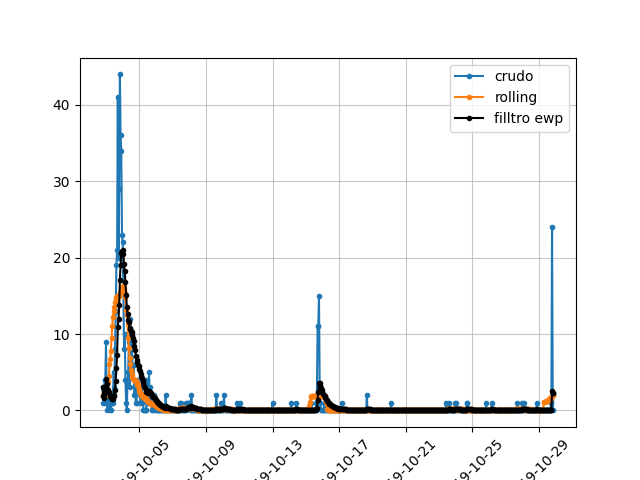

In [45]:
df['Fecha'] =  pd.to_datetime(df['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y')
res_index = df.set_index('Fecha')
df_count_hora = res_index.resample('1H').count()
df_suavizado = df_count_hora.rolling('1D', center = True).mean()
df_suavizado_2 = df_count_hora.ewm( alpha = 0.1).mean()

%matplotlib widget
plt.figure()
plt.plot(df_count_hora.index, df_count_hora['Tweets'], label = 'crudo', marker = '.') #Test comparation
plt.plot(df_suavizado.index, df_suavizado['Tweets'], label = 'rolling', marker = '.', linestyle = 'solid')
plt.plot(df_suavizado_2.index, df_suavizado_2['Tweets'], label = 'filltro ewp', marker = '.', linestyle = 'solid', color = 'k')

plt.xticks(rotation = 45)
plt.legend()
plt.grid(alpha = 0.7)
plt.show()